## Below machine learning models are senitivie to outliers

1. Naviye Bayes Classifier - not sensitive
2. SVM                     - not sensitive
3. Linear Regression       - sensitive
4. Logistic Regression     - sensitive
5. Decision Tree both      - not sensitive
6. Ensemble (RF, XGBoost,GB- not sensitive
7. KNN                     - sensitive
8. K means                 - sensitive
9. Hierarichal             - sensitive
10. PCA                    - sensitive
11. Neural Network         - sensitive

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("titanic_train.csv")

In [12]:
df['Age'].isnull().sum()

177

In [13]:
import seaborn as sns

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

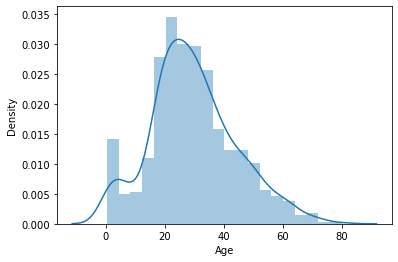

In [14]:
sns.distplot(df['Age']) #its look like no outlier

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

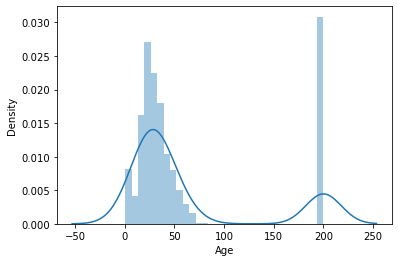

In [15]:
sns.distplot(df['Age'].fillna(200)) #here we can see outlier

### Gaussian Distrubution

Text(0, 0.5, 'no of people')

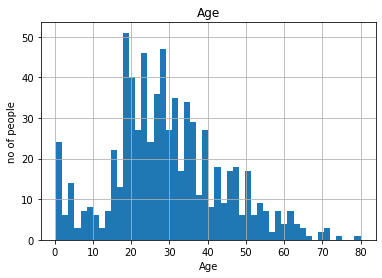

In [21]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel("Age")
figure.set_ylabel('no of people')

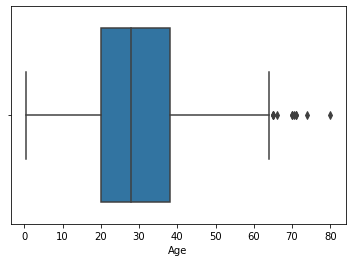

In [23]:
figure1=sns.boxplot(x=df['Age'])

In [24]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### assuming Age following a gaussian distribution we will calculate the boundaries which differentiates the outliers

In [25]:
upper_boundary=df['Age'].mean() + 3*df['Age'].std()

In [26]:
lower_boundary=df['Age'].mean() - 3*df['Age'].std()

In [27]:
print("upper boundary",upper_boundary,"lower boundary",lower_boundary)

upper boundary 73.27860964406095 lower boundary -13.88037434994331


#### let compute the interquantile range to calculate the boundaries

In [28]:
IQR =df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [29]:
IQR

17.875

In [30]:
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5) #basic normal we can use 1.5
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)

print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


#### Feature is skewed

Text(0, 0.5, 'no of people')

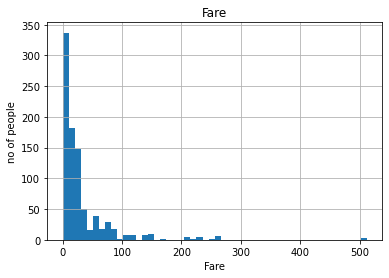

In [32]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel("Fare")
figure.set_ylabel('no of people')

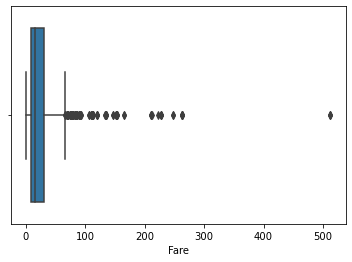

In [33]:
figure1=sns.boxplot(x=df['Fare'])

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
IQR =df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [37]:
upper_boundary1=df['Fare'].mean() + 3*df['Fare'].std()
lower_boundary1=df['Fare'].mean() - 3*df['Fare'].std()

In [39]:
print("upper boundary1",upper_boundary1,"lower boundary1",lower_boundary1)

upper boundary1 181.2844937601173 lower boundary1 -116.87607782296811


for upper value we can replace with some values



In [43]:
 df.loc[df['Age']>=73,'Age']=73  #if age is greater than 73 we replace with 73 for outlier

In [42]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [45]:
df.loc[df['Fare']>=100,'Fare']=100  #if fare value is greater than 100 replace with 100

<AxesSubplot:>

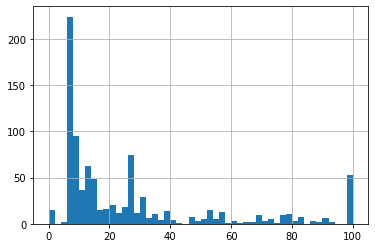

In [46]:
df['Fare'].hist(bins=50)